# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [0]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [0]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True,batch_size=10)
test_loader = DataLoader(dataset=dataset_test, shuffle=False)

dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.size())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

torch.Size([10, 1, 32, 32])
cuda:0


In [0]:
# Definir a arquitetura MLP

class MLP(nn.ModuleList):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(32*32,100)
    self.fc2 = nn.Linear(100,100)
    self.fc3 = nn.Linear(100, 10)
       

       
       
  def forward(self, x):
    x = x.view(-1, 32*32)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.log_softmax(self.fc3(x),dim =1)
    return x

In [0]:
class MLP2(nn.ModuleList):
  def __init__(self):
    super(MLP2, self).__init__()
    self.fc1 = nn.Linear(32*32,100)
    self.fc2 = nn.Linear(100,100)
    self.fc3 = nn.Linear(100, 10)
    self.activation_function = nn.Sigmoid()
  def forward(self, x):
    x = x.view(-1, 32*32)
    x = self.activation_function(self.fc1(x))
    x = self.activation_function(self.fc2(x))
    x =F.log_softmax(self.fc3(x),dim =1)
    return x
      



In [0]:
class MLP3(nn.ModuleList):
  def __init__(self):
    super(MLP3, self).__init__()
    self.fc1 = nn.Linear(32*32,100)
    self.fc2 = nn.Linear(100,100)
    self.fc3 = nn.Linear(100,100)
    self.fc4 = nn.Linear(100, 10)
       

       
        
  def forward(self, x):
    x = x.view(-1, 32*32)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x =F.log_softmax(self.fc4(x),dim =1)
       

    return x
      

In [0]:

class MLP4(nn.ModuleList):
  def __init__(self):
    super(MLP4, self).__init__()
    self.fc1 = nn.Linear(32*32,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64, 10)
       

       
      
  def forward(self, x):
    x = x.view(-1, 32*32)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x =F.log_softmax(self.fc4(x),dim =1)
       

    return x


In [0]:
def one_hot(labels, shape):
    o_hot = np.zeros(shape)
    o_hot[labels] = 1
    return o_hot

#Treinamento

In [0]:
# Realizar o treinamento aqui
def train(epochs,train_loss,test_loss,optimizer,loss_fn,test_acc,model):
  
  #print(optimizer)
  #print(model)
  #print(loss_fn)
  for epoch in range(epochs):
    model.train() 
    train_losses = []   
    for i, (images,labels) in enumerate(train_loader):
      images,labels = images.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      loss = loss_fn(outputs,labels)
      loss.backward()
      optimizer.step()
      train_losses.append(loss.item())
    
    train_loss.append(np.mean(train_losses))
    
  #  print('epoch : {}, train loss : {:.4f}'\
     #    .format(epoch+1, np.mean(train_losses)))
    validation(loss_fn,test_loss,test_acc,model)
    
  

#Avaliação 

In [0]:

# Avaliar o modelo aqui (no conjunto de teste)
def validation(loss_fn,test_loss,test_acc,model):
  model.eval()
  correct =0
  total = 0
  loss=0
  accuracy=0
  test_losses = []
  for i, (images, labels) in enumerate(test_loader):
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    test_losses.append(loss.item())  
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
  
   
  accuracy = 100*correct/total
  test_acc.append(accuracy)
  test_loss.append(np.mean(test_losses))
  #print(' test_loss : {:.4f} , test_ acc : {:.2f}%'\
       # .format(np.mean(test_losses),accuracy))

#definindo otimizadores e funçoes loss


In [0]:

model1 = MLP().to(device)
model2 = MLP().to(device)
model3 = MLP().to(device)
print(model1)


MLP(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [0]:
# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)

optimizerSGD = torch.optim.SGD(model1.parameters(), lr = 0.01,momentum=0.5)
optimizerADAM = torch.optim.Adam(model2.parameters(), lr=0.00001)
optimizerRMS = torch.optim.RMSprop(model3.parameters(), lr=0.01)

loss_cross =  nn.CrossEntropyLoss()
loss_nll = nn.NLLLoss()

#testando diferentes otimizadores

In [400]:


test_loss = []
train_loss = []
test_acc_SGD = []
test_acc_ADAM = []
test_acc_RMS = []
epochs = 50


print("SGD")
train(epochs,train_loss,test_loss,optimizer = optimizerSGD, loss_fn = loss_cross,test_acc =test_acc_SGD,model = model1)
print("ADAM")
train(epochs,train_loss,test_loss,optimizer = optimizerADAM, loss_fn = loss_cross,test_acc =test_acc_ADAM,model = model2)
print("RMS")
train(epochs,train_loss,test_loss,optimizer = optimizerRMS, loss_fn = loss_cross,test_acc =test_acc_RMS,model = model3)
print(test_acc_SGD)

  

SGD
ADAM
RMS
[29.66, 34.27, 34.82, 36.8, 37.01, 39.21, 39.49, 41.04, 38.94, 39.78, 40.43, 41.63, 39.07, 42.31, 41.4, 41.34, 42.22, 41.54, 42.54, 42.6, 42.72, 42.26, 42.46, 42.14, 42.56, 42.02, 42.48, 42.56, 42.99, 42.64, 43.32, 41.91, 42.02, 42.59, 42.08, 42.56, 42.12, 42.2, 43.09, 42.22, 43.05, 42.16, 41.71, 42.08, 42.8, 41.78, 42.56, 41.45, 42.5, 42.57]


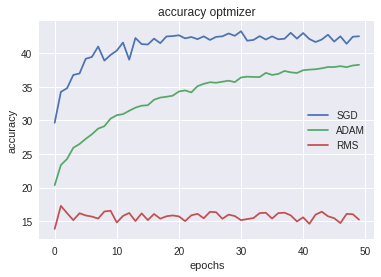

In [401]:

plt.title("accuracy optmizer")
x = np.arange(0,epochs)
plt.plot(x,test_acc_SGD,label = "SGD")
plt.plot(x,test_acc_ADAM,label = "ADAM")
plt.plot(x,test_acc_RMS,label = "RMS")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()





#Testando diferentes loss no SGD

In [402]:

model1 = MLP().to(device)
model2 = MLP().to(device)
print(model1)
print(model2)


optimizerSGD1 = torch.optim.SGD(model1.parameters(), lr = 0.01,momentum=0.5)
optimizerSGD2 = torch.optim.SGD(model2.parameters(), lr = 0.01,momentum=0.5)

loss_cross =  nn.CrossEntropyLoss()
loss_nll = nn.NLLLoss()

MLP(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)
MLP(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [0]:
epochs =50
test_loss = []
train_loss = []
test_acc_CROSS = []
test_acc_NLL = []

train(epochs,train_loss,test_loss,optimizer = optimizerSGD1, loss_fn = loss_cross,test_acc =test_acc_CROSS,model = model1)
train(epochs,train_loss,test_loss,optimizer = optimizerSGD2, loss_fn = loss_nll,test_acc =test_acc_NLL,model = model2)

  

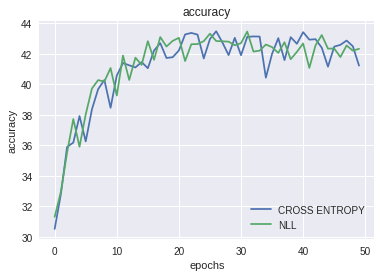

In [404]:
  
plt.title("accuracy")
x = np.arange(0,epochs)
plt.plot(x,test_acc_CROSS,label = "CROSS ENTROPY")
plt.plot(x,test_acc_NLL,label = "NLL")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


#Testando Diferentes arquiteturas no SGD com Cross-Entropy

In [405]:
model1 = MLP().to(device) #Uma camada escondida com 100 neuronios, função = Relu
model2 = MLP2().to(device)#Uma camada escondida com 100 neuronios, função = Sigmoid
model3 = MLP3().to(device)#Duas camadas escondidas com 100 neuronios cada, função = Relu
model4 = MLP4().to(device)#Duas camadas com neuronios variados, função = Relu
print(model1)
print(model2)
print(model3)
print(model4)


optimizerSGD1 = torch.optim.SGD(model1.parameters(), lr = 0.01,momentum=0.5)
optimizerSGD2 = torch.optim.SGD(model2.parameters(), lr = 0.01,momentum=0.5)
optimizerSGD3 = torch.optim.SGD(model3.parameters(), lr = 0.01,momentum=0.5)
optimizerSGD4 = torch.optim.SGD(model4.parameters(), lr = 0.01,momentum=0.5)

loss_cross =  nn.CrossEntropyLoss()


MLP(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)
MLP2(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (activation_function): Sigmoid()
)
MLP3(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)
MLP4(
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
epochs =50
test_loss = []
train_loss = []
test_acc_MLP1 = []
test_acc_MLP2 = []
test_acc_MLP3 = []
test_acc_MLP4 = []

train(epochs,train_loss,test_loss,optimizer = optimizerSGD1, loss_fn = loss_cross,test_acc = test_acc_MLP1,model = model1)
train(epochs,train_loss,test_loss,optimizer = optimizerSGD2, loss_fn = loss_cross,test_acc =test_acc_MLP2,model = model2)
train(epochs,train_loss,test_loss,optimizer = optimizerSGD3, loss_fn = loss_cross,test_acc =test_acc_MLP3,model = model3)
train(epochs,train_loss,test_loss,optimizer = optimizerSGD4, loss_fn = loss_cross,test_acc =test_acc_MLP4,model = model4)

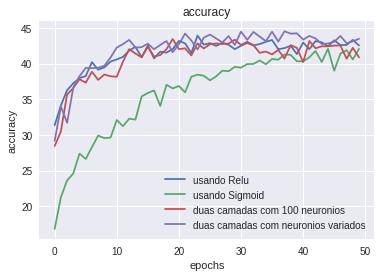

In [407]:
  
plt.title("accuracy")
x = np.arange(0,epochs)
plt.plot(x,test_acc_MLP1,label = "usando Relu")
plt.plot(x,test_acc_MLP2,label = "usando Sigmoid")
plt.plot(x,test_acc_MLP3,label = "duas camadas com 100 neuronios")
plt.plot(x,test_acc_MLP4,label = "duas camadas com neuronios variados")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()